# Comparing the basic Commot output and the baseline

In [4]:


import os
import gc
import ot
import pickle
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.stats import spearmanr, pearsonr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

import commot as ct

In [13]:
#Reading the results from the commot analysis (done in commot_VISTA_L1_1_L1_2_L4_1) -> 

In [6]:
path_L1_1_dis500_commot = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/data/chuvio_L1_1_dis500.h5ad"
path_L1_2_dis500_commot = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/data/chuvio_L1_2_dis500.h5ad"
path_L2_1_dis500_commot = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/data/chuvio_L2_1_dis500.h5ad"

L1_1_dis500_commot = sc.read_h5ad(path_L1_1_dis500_commot)
L1_2_dis500_commot = sc.read_h5ad(path_L1_2_dis500_commot)
L2_1_dis500_commot = sc.read_h5ad(path_L2_1_dis500_commot)


#### OUT checking run time for commot, file sizes

In [9]:
import os
import time

# Path to the file/directory
path = path_adata_chuv_dis500

# Both the variables would contain time
# elapsed since EPOCH in float
ti_c = os.path.getctime(path)
ti_m = os.path.getmtime(path)

# Converting the time in seconds to a timestamp
c_ti = time.ctime(ti_c)
m_ti = time.ctime(ti_m)

print(f"The file located at the path {path} \
was created at {c_ti} and was "
      f"last modified at {m_ti}")

The file located at the path /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/adata_chuv_dis500.h5ad was created at Thu Apr 25 11:43:14 2024 and was last modified at Thu Apr 25 11:43:14 2024


In [18]:
# Define the file path
file_path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/data/chuvio_L1_1_dis500.h5ad"

# Check if the file exists
if os.path.exists(file_path):
    # Get the size of the file in bytes
    file_size_bytes = os.path.getsize(file_path)
    
    # Convert bytes to gigabytes (GB)
    file_size_gb_L1_1 = file_size_bytes / (10**9)

# Define the file path
file_path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/data/chuvio_L1_2_dis500.h5ad"

# Check if the file exists
if os.path.exists(file_path):
    # Get the size of the file in bytes
    file_size_bytes = os.path.getsize(file_path)
    
    # Convert bytes to gigabytes (GB)
    file_size_gb_L1_2 = file_size_bytes / (10**9)

# Define the file path
file_path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/data/chuvio_L2_1_dis500.h5ad"

# Check if the file exists
if os.path.exists(file_path):
    # Get the size of the file in bytes
    file_size_bytes = os.path.getsize(file_path)
    
    # Convert bytes to gigabytes (GB)
    file_size_gb_L2_1 = file_size_bytes / (10**9)

Commot_files = [file_size_gb_L1_1, file_size_gb_L1_2, file_size_gb_L2_1]

In [16]:
import os

# Define the file path
file_path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L1_1.h5ad"

# Check if the file exists
if os.path.exists(file_path):
    # Get the size of the file in bytes
    file_size_bytes = os.path.getsize(file_path)
    
    # Convert bytes to gigabytes (GB)
    file_size_gb = file_size_bytes / (10**9)

# Define the file path
file_path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L1_1.h5ad"

# Check if the file exists
if os.path.exists(file_path):
    # Get the size of the file in bytes
    file_size_bytes = os.path.getsize(file_path)
    
    # Convert bytes to gigabytes (GB)
    file_size_gb_L1_1 = file_size_bytes / (10**9)

# Define the file path
file_path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L1_2.h5ad"

# Check if the file exists
if os.path.exists(file_path):
    # Get the size of the file in bytes
    file_size_bytes = os.path.getsize(file_path)
    
    # Convert bytes to gigabytes (GB)
    file_size_gb_L1_2 = file_size_bytes / (10**9)

# Define the file path
file_path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L2_1.h5ad"

# Check if the file exists
if os.path.exists(file_path):
    # Get the size of the file in bytes
    file_size_bytes = os.path.getsize(file_path)
    
    # Convert bytes to gigabytes (GB)
    file_size_gb_L2_1 = file_size_bytes / (10**9)

original_files = [file_size_gb_L1_1, file_size_gb_L1_2, file_size_gb_L2_1]

In [19]:
Commot_files

[6.232284981, 3.925888828, 2.554641431]

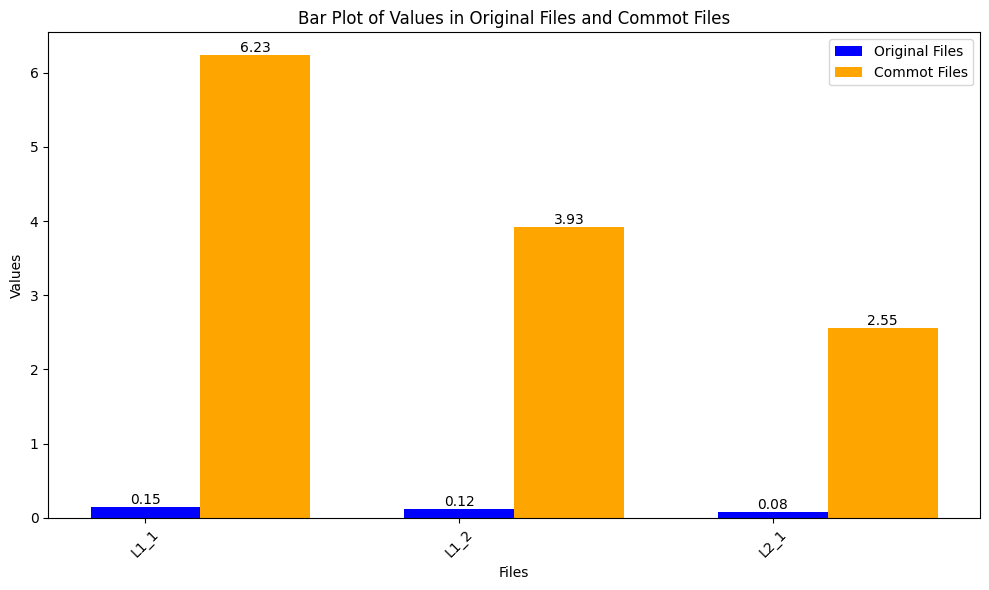

In [22]:
import matplotlib.pyplot as plt

# X-axis labels
labels = ['L1_1', 'L1_2', 'L2_1']

# Plotting the bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(labels))
bars1 = plt.bar(index, original_files, width=bar_width, label='Original Files', color='blue')
bars2 = plt.bar([i + bar_width for i in index], Commot_files, width=bar_width, label='Commot Files', color='orange')
plt.xlabel('Files')
plt.ylabel('Values')
plt.title('file sizes')
plt.legend()

# Adding the values at the top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(index, labels)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Getting gene paths heat map

In [ ]:
lists_as_string = ['L1_1', 'L1_2', 'L2_1']

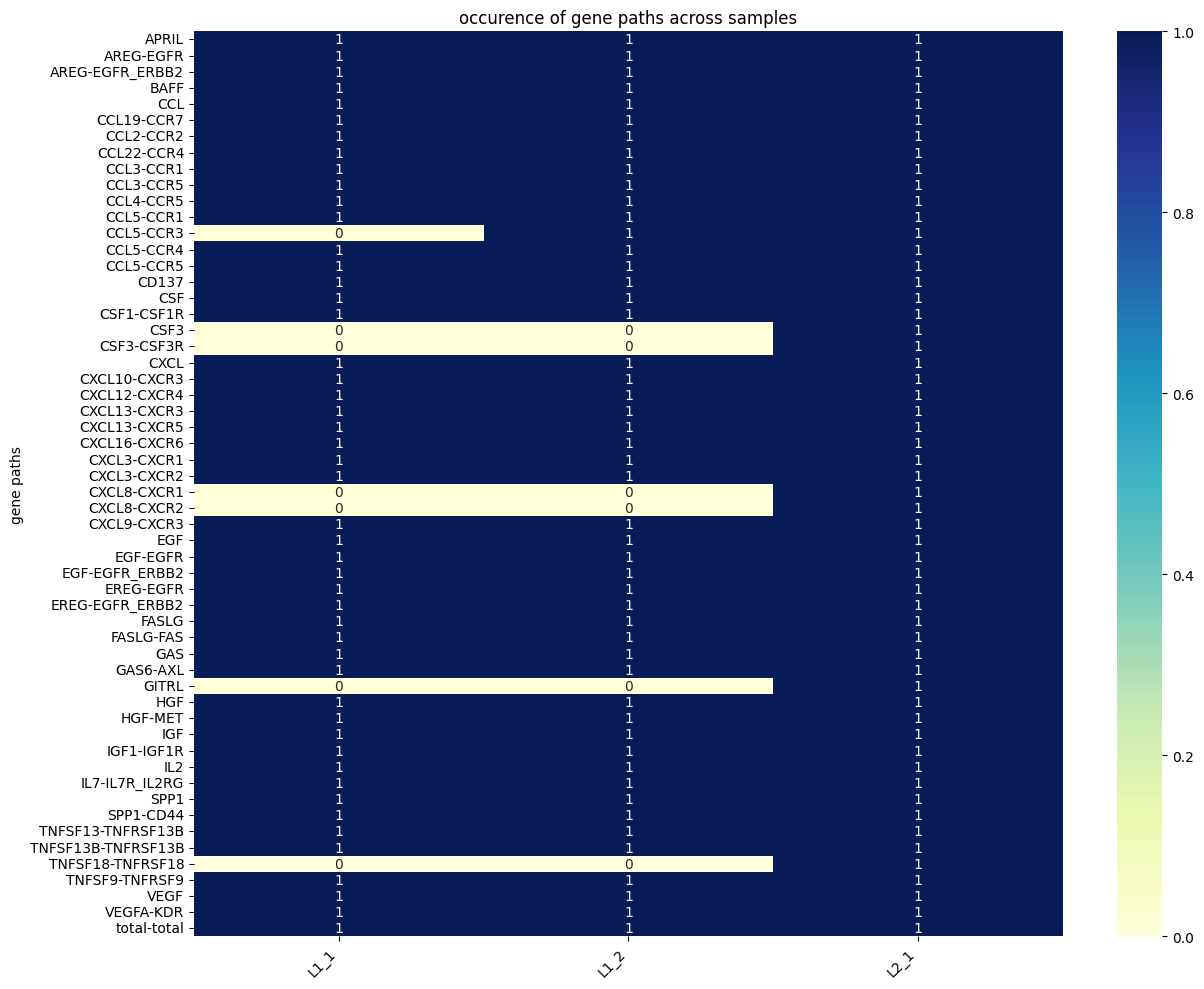

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

#Retrieve the gene paths
L1_1_dis500_commot_keys = list(L1_1_dis500_commot.obsp.keys())
L1_2_dis500_commot_keys = list(L1_2_dis500_commot.obsp.keys())
L2_1_dis500_commot_keys = list(L2_1_dis500_commot.obsp.keys())

# Define the lists
lists = [L1_1_dis500_commot_keys, L1_2_dis500_commot_keys, L2_1_dis500_commot_keys]

lists_as_string = ['L1_1', 'L1_2', 'L2_1']

# Count occurrences of each string in each list
occurrences = {}
for i, lst in enumerate(lists, start=1):
    for item in lst:
        # Remove the first 16 characters from each label
        label = item[16:]
        occurrences[(label, f'List{i}')] = occurrences.get((label, f'List{i}'), 0) + 1

# Convert occurrences to a matrix
matrix = []
row_labels = sorted(set([item[0] for item in occurrences.keys()]))
col_labels = [f'List{i+1}' for i in range(len(lists))]

for label in row_labels:
    row = []
    for lst in lists:
        count = occurrences.get((label, f'List{lists.index(lst) + 1}'), 0)
        row.append(count)
    matrix.append(row)

# Create a heatmap
plt.figure(figsize=(13, 10))  # Adjust the size of the figure
sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=lists_as_string, yticklabels=row_labels)
plt.ylabel("gene paths")
plt.title("occurence of gene paths across samples")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
L1_1_dis500_commot_keys = list(L1_1_dis500_commot.obsp.keys())

In [27]:
L1_1_dis500_commot_keys

['commot-cellchat-APRIL',
 'commot-cellchat-AREG-EGFR',
 'commot-cellchat-AREG-EGFR_ERBB2',
 'commot-cellchat-BAFF',
 'commot-cellchat-CCL',
 'commot-cellchat-CCL19-CCR7',
 'commot-cellchat-CCL2-CCR2',
 'commot-cellchat-CCL22-CCR4',
 'commot-cellchat-CCL3-CCR1',
 'commot-cellchat-CCL3-CCR5',
 'commot-cellchat-CCL4-CCR5',
 'commot-cellchat-CCL5-CCR1',
 'commot-cellchat-CCL5-CCR4',
 'commot-cellchat-CCL5-CCR5',
 'commot-cellchat-CD137',
 'commot-cellchat-CSF',
 'commot-cellchat-CSF1-CSF1R',
 'commot-cellchat-CXCL',
 'commot-cellchat-CXCL10-CXCR3',
 'commot-cellchat-CXCL12-CXCR4',
 'commot-cellchat-CXCL13-CXCR3',
 'commot-cellchat-CXCL13-CXCR5',
 'commot-cellchat-CXCL16-CXCR6',
 'commot-cellchat-CXCL3-CXCR1',
 'commot-cellchat-CXCL3-CXCR2',
 'commot-cellchat-CXCL9-CXCR3',
 'commot-cellchat-EGF',
 'commot-cellchat-EGF-EGFR',
 'commot-cellchat-EGF-EGFR_ERBB2',
 'commot-cellchat-EREG-EGFR',
 'commot-cellchat-EREG-EGFR_ERBB2',
 'commot-cellchat-FASLG',
 'commot-cellchat-FASLG-FAS',
 'commot-c

#### Printing commot results 

In [8]:
L1_1_dis500_commot

AnnData object with n_obs × n_vars = 71187 × 313
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'libsize_drop', 'sizeFactor', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'singler_annotation', 'ident'
    uns: 'X_name', 'commot-cellchat-info'
    obsm: 'PCA', 'TSNE', 'UMAP', 'commot-cellchat-sum-receiver', 'commot-cellchat-sum-sender', 'spatial'
    layers: 'logcounts'
    obsp: 'commot-cellchat-APRIL', 'commot-cellchat-AREG-EGFR', 'commot-cellchat-AREG-EGFR_ERBB2', 'commot-cellchat-BAFF', 'commot-cellchat-CCL', 'commot-cellchat-CCL19-CCR7', 'commot-cellchat-CCL2-CCR2', 'commot-cellchat-CCL22-CCR4', 'commot-cellchat-CCL3-

In [20]:
ct.tl.communication_direction(adata_dis500, database_name='cellchat', pathway_name='CXCL', k=5)

In [21]:
adata_dis500

AnnData object with n_obs × n_vars = 72666 × 271
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'libsize_drop', 'sizeFactor', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'singler_annotation', 'ident'
    uns: 'X_name', 'commot-cellchat-info'
    obsm: 'PCA', 'TSNE', 'UMAP', 'commot-cellchat-sum-receiver', 'commot-cellchat-sum-sender', 'spatial', 'commot_sender_vf-cellchat-CXCL', 'commot_receiver_vf-cellchat-CXCL'
    layers: 'logcounts'
    obsp: 'commot-cellchat-AREG-EGFR', 'commot-cellchat-CXCL', 'commot-cellchat-CXCL10-ACKR1', 'commot-cellchat-CXCL13-ACKR1', 'commot-cellchat-CXCL13-CXCR5', 'commot-cellchat-CXCL5-ACKR1

<Axes: >

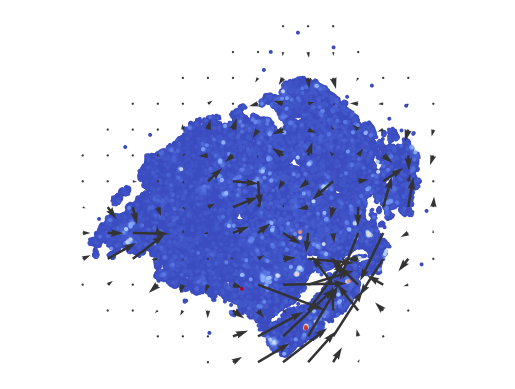

In [35]:
ct.pl.plot_cell_communication(adata_dis500, database_name='cellchat', pathway_name='CXCL', plot_method='grid', background_legend=False,
    scale=0.00009, ndsize=8, grid_density=0.3, normalize_v = True, normalize_v_quantile=0.995)